## Observations and Insights 

In [322]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
mouse_study_complete.head()
#mouse_study_complete.to_csv("data/before_clean.csv")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [151]:
# Checking the number of mice.
number_of_mice = mouse_metadata["Mouse ID"].count()
print(f'The total number of mice: {number_of_mice}')

The total number of mice: 249


In [152]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoint = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

duplicate_mice_id = duplicate_timepoint["Mouse ID"].unique()
print("The duplicated Mice ID is: " + duplicate_mice_id)

duplicate_timepoint[["Mouse ID","Timepoint"]]

['The duplicated Mice ID is: g989']


,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [153]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_data = mouse_study_complete.drop_duplicates(['Mouse ID','Timepoint'],keep= 'last')

mouse_study_clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [155]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2 = mouse_study_clean_data['Mouse ID'].nunique()
print(f'The number of mice in cleaned data: {number_of_mice2}')

The number of mice in cleaned data: 249


## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_regimen=mouse_study_clean_data.groupby(['Drug Regimen'])

Tumor_volume_Mean1 = grouped_regimen["Tumor Volume (mm3)"].mean()
Tumor_volume_Median1 = grouped_regimen["Tumor Volume (mm3)"].median()
Tumor_volume_Variance1 = grouped_regimen["Tumor Volume (mm3)"].var()
Tumor_volume_std_deviation1 = grouped_regimen["Tumor Volume (mm3)"].std()
Tumor_volume_SEM1 = grouped_regimen["Tumor Volume (mm3)"].sem()

summary_stats = {"Tumor_volume_Mean" : Tumor_volume_Mean1,
                 "Tumor_volume_Median" : Tumor_volume_Median1,
                 "Tumor_volume_Variance" : Tumor_volume_Variance1,
                 "Tumor_volume_std_deviation" : Tumor_volume_std_deviation1,
                 "Tumor_volume_SEM" : Tumor_volume_SEM1}

summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Tumor_volume_Mean,Tumor_volume_Median,Tumor_volume_Variance,Tumor_volume_std_deviation,Tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = mouse_study_clean_data.groupby(['Drug Regimen']).agg(Tumor_volume_Mean=('Tumor Volume (mm3)','mean'),
                                                                    Tumor_volume_Median=('Tumor Volume (mm3)','median'),
                                                                    Tumor_volume_Variance=('Tumor Volume (mm3)','var'),
                                                                    Tumor_volume_std_deviation=('Tumor Volume (mm3)','std'),
                                                                    Tumor_volume_SEM=('Tumor Volume (mm3)','sem'))

summary_stats_agg_df=pd.DataFrame(summary_stats_agg)
summary_stats_agg_df

,Tumor_volume_Mean,Tumor_volume_Median,Tumor_volume_Variance,Tumor_volume_std_deviation,Tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

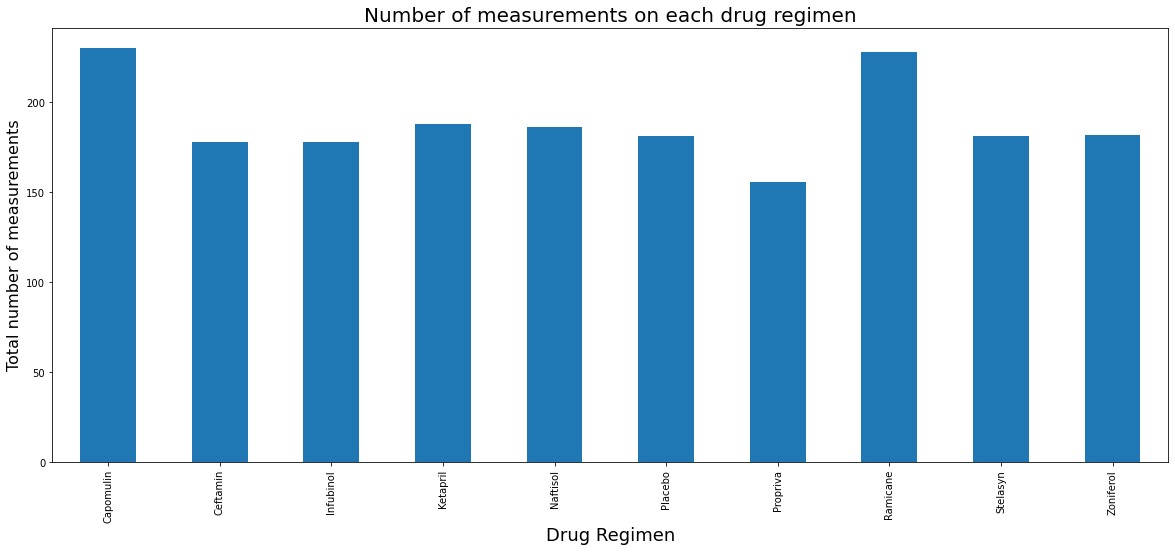

<Figure size 432x288 with 0 Axes>

In [192]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_of_measurments = mouse_study_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()

pd_bar_chart = num_of_measurments.plot(kind="bar",figsize=(20,8))

plt.xlabel("Drug Regimen",fontsize=18)
plt.ylabel("Total number of measurements", fontsize = 16)
plt.title("Number of measurements on each drug regimen", fontsize = 20)

plt.show()
plt.tight_layout()

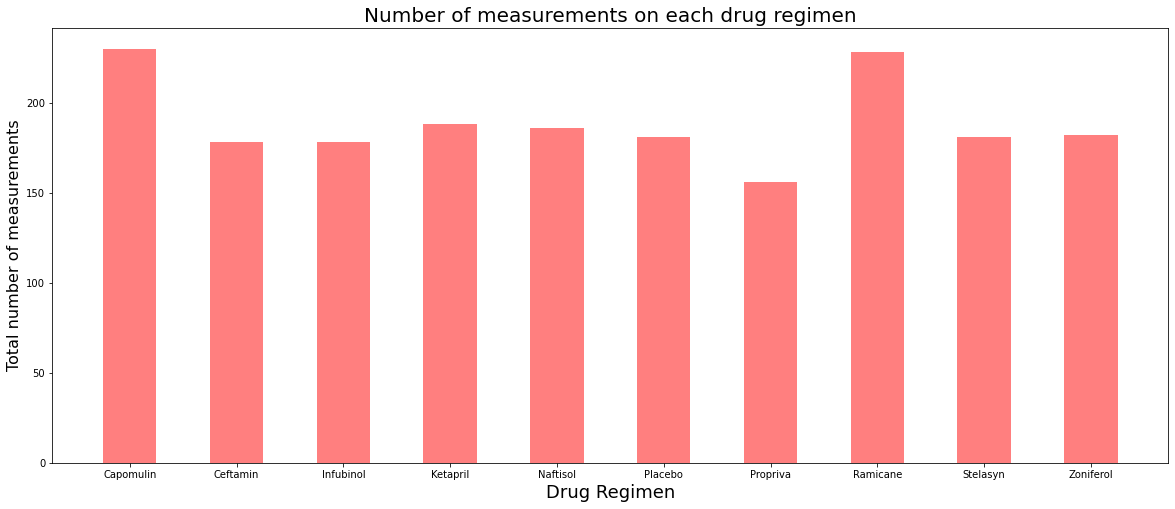

In [194]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurments1 = mouse_study_clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].count().reset_index(name ='number')

x_axis = total_measurments1["Drug Regimen"]
y_axis = total_measurments1["number"]

plt.figure(figsize=(20,8))
plt.bar(x_axis,y_axis,color = 'r',alpha = 0.5,width = 0.5)

plt.xlabel("Drug Regimen",fontsize=18)
plt.ylabel("Total number of measurements", fontsize = 16)
plt.title("Number of measurements on each drug regimen", fontsize = 20)
plt.show()

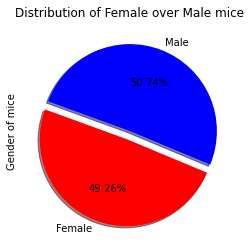

In [255]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_groups = mouse_study_clean_data.groupby(['Sex']).size()

mice_groups.plot(kind='pie', autopct='%.2f%%', startangle = 160,shadow=True,explode = (0.1,0),colors = ["red","blue"],title = 'Distribution of Female over Male mice')
plt.ylabel("Gender of mice")
plt.show()

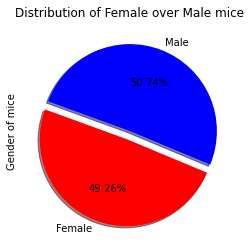

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_groups1 = mouse_study_clean_data.groupby(['Sex']).size().reset_index(name = 'Number')
mice_gender = mice_groups1["Sex"]
mice_count = mice_groups1["Number"]

plt.pie(mice_count,labels = mice_gender, autopct='%.2f%%', startangle = 160,shadow=True,explode = (0.1,0),colors = ["red","blue"])
plt.title('Distribution of Female over Male mice')
plt.ylabel("Gender of mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [275]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_regimen = mouse_study_clean_data.loc[mouse_study_clean_data["Drug Regimen"].isin(regimen_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_regimen.sort_values(["Mouse ID","Drug Regimen","Timepoint"]).groupby('Mouse ID').last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = last_timepoint[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
tumor_volume_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,31.896238
y865,Ceftamin,45,64.729837


In [310]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume = tumor_volume_df['Tumor Volume (mm3)']
#print(f'The tumor volume: {tumor_volume}')
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  
print(f'IQR :{iqr}')

print(f"The lower quartile of tumor_volume is: {lowerq}")
print(f"The upper quartile of tumor_volume is: {upperq}")
print(f"The interquartile range of tumor_volume is: {iqr}")
print(f"The the median of tumor_volume is: {quartiles[0.5]} ")


# Locate the rows which contain mice on each drug and get the tumor volumes
regimen_capomulin = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)'].values
regimen_ramicane = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Ramicane','Tumor Volume (mm3)'].values
regimen_infubinol = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)'].values
regimen_ceftamin = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)'].values

# add subset 
tumor_vol_data=[regimen_capomulin, regimen_ramicane, regimen_infubinol, regimen_ceftamin]    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  

IQR :22.74251795250001
The lower quartile of tumor_volume is: 37.187743802499995
The upper quartile of tumor_volume is: 59.930261755000004
The interquartile range of tumor_volume is: 22.74251795250001
The the median of tumor_volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


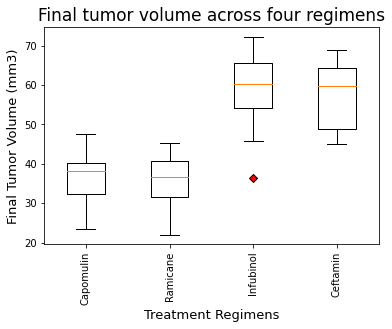

In [321]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
bp = ax1.boxplot(tumor_vol_data)


for flier in bp['fliers']: 
    flier.set(marker ='D', markerfacecolor = 'r',
              color ='#e7298a')
ax1.set_xticklabels(treatment_regimen,rotation = 'vertical')
ax1.set_title("Final tumor volume across four regimens",fontsize=17)
ax1.set_xlabel("Treatment Regimens",fontsize=13)
ax1.set_ylabel("Final Tumor Volume (mm3)",fontsize=13)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


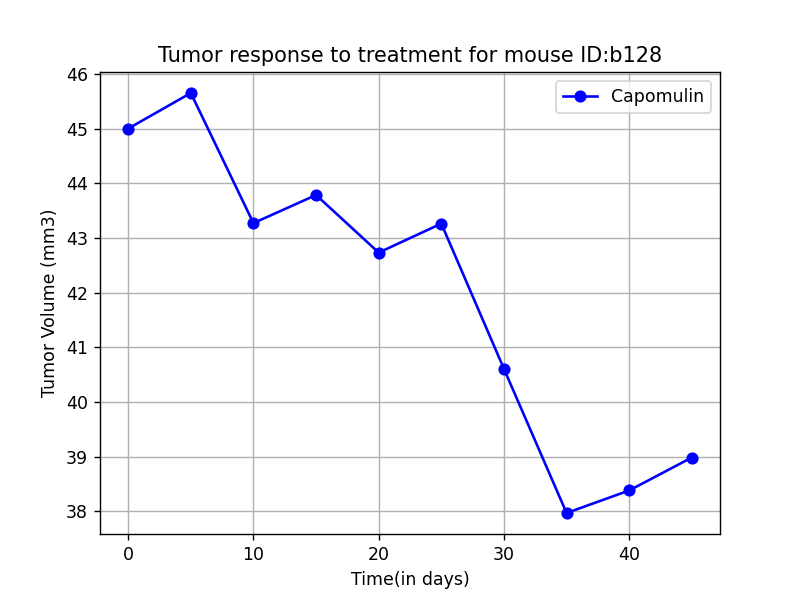

In [352]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_study_clean_data.head()
capomulin_treated = mouse_study_clean_data.loc[(mouse_study_clean_data['Drug Regimen'] == "Capomulin") 
                                               & (mouse_study_clean_data['Mouse ID'] == 'b128')]
x_capomulin = capomulin_treated['Timepoint']
y_capomulin = capomulin_treated['Tumor Volume (mm3)']
mouse_id = capomulin_treated
plt.plot(x_capomulin, y_capomulin, color="blue", marker = 'o',label = "Capomulin")
plt.xlabel("Time(in days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.title("Tumor response to treatment for mouse ID:b128")

plt.grid()
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
